# 1. Outliers

# 2. How outliers are introduced in data

In [ ]:
1. Data entry error: Human Errors
2. Measurement Error : Machine Error/ Instrument error
3. Intentional error: Dummy Dataset
4. Sampling Error: Mixing of data from wrong resources
5. Natural Error: Most of actual data belongs to this category

# 3. Impact of Outliers

In [ ]:
1. Reduce the power statistical analysis
2. High impact on mean value and std
3. Algorithms do not perform well in presence of outliers(Accuracy,precision,recall,mse)
4. Impact on basic assumptions of regression(normality,homoscedasticity)

# 4. Detect Outliers

In [ ]:
1. z-score
2. IQR Method
3. Boxplot 
4. Scatterplot

# 5. Handle Outliers

In [ ]:
1. Delete Observation
2. Imputaion (mean , median, mode, zeros, ,any static value)
3. Transformation: (Used to reduce the imapct of outliers)
    1. log transformation
    2. Normalization(0 to 1 range)
    3. Standardization(no fixed range)
    4. CubeRoot transformation
    5. reciprocal transformation

# 6. Outliers impact on Algorithms

## 6.1 Sensitive to outliers

In [ ]:
1. Linear Regression
2. Logistic Regression
3. K-Nearest Neighbour 
4. Support Vector Machin
5. K-means clustering

## 6.2 Not Sensitive to outliers

In [ ]:
1. Decision Tree
2. Random Forest
3. AdaBoost 
4. XGBoost
5. Naive Bayes Classifier
6. Gradient Boosting

# 7. How to Detect Outliers

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
array1 = np.random.randint(10,30,size = 20)
array1

array([29, 10, 28, 27, 14, 17, 20, 21, 24, 13, 17, 16, 27, 21, 23, 21, 21,
       21, 17, 19])

In [23]:
array2 = [17, 11, 25, 29, 27, 180, 23, 27, 28, 23, 210, 10, 28, 24, 28, 12, 10,
       23, 15, 26]


<AxesSubplot:ylabel='Density'>

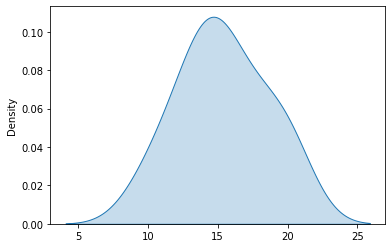

In [25]:
sns.kdeplot(array1,fill=True)

<AxesSubplot:ylabel='Density'>

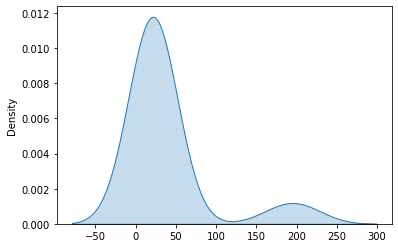

In [27]:
sns.kdeplot(array2,fill=True)

In [28]:
from scipy.stats import shapiro

In [30]:
_,p_val = shapiro(array1)
print('P val is :',p_val)
if p_val > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

P val is : 0.7409752011299133
Data is normally distributed


In [32]:
_,p_val = shapiro(array2)
print('P val is :',p_val)
if p_val > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

P val is : 1.785159469136488e-07
Data is not normally distributed


# 1. Z-Score 

In [34]:
array1 = np.random.randint(10,30,size = 20)
array1

array([20, 18, 19, 28, 18, 11, 20, 21, 24, 27, 15, 22, 27, 28, 27, 21, 17,
       18, 26, 26])

In [ ]:
# Standardization

z_score = (X - Xmean)/std 

Xmean >> mean value
std >> standard deviation

In [44]:
print(array1)
mean =np.mean(array1)
std = np.std(array1)
print(f"Mean == {mean}, std == {std}")

threshold = 3
outliers_list = []
for x_val in array1:
    z_score = (x_val - mean)/std
    
    z_score = np.abs(z_score)
    print(x_val , '>>' ,z_score)
    if z_score > threshold:
        outliers_list.append(x_val)
    
print("Outliers are :",outliers_list)

[20 18 19 28 18 11 20 21 24 27 15 22 27 28 27 21 17 18 26 26]
Mean == 21.65, std == 4.703987670051868
20 >> 0.35076622553770537
18 >> 0.7759374080076515
19 >> 0.5633518167726784
28 >> 1.3499185043420796
18 >> 0.7759374080076515
11 >> 2.2640365466524632
20 >> 0.35076622553770537
21 >> 0.13818063430273222
24 >> 0.49957613940218715
27 >> 1.1373329131071066
15 >> 1.413694181712571
22 >> 0.07440495693224089
27 >> 1.1373329131071066
28 >> 1.3499185043420796
27 >> 1.1373329131071066
21 >> 0.13818063430273222
17 >> 0.9885229992426247
18 >> 0.7759374080076515
26 >> 0.9247473218721334
26 >> 0.9247473218721334
Outliers are : []


In [ ]:
print(array2)
mean = np.mean(array2)  # df['col'].mean()
std = np.std(array2)

print(f"Mean == {mean}, std == {std}")

threshold = 2
outliers_list = []
for x_val in array2:
    z_score = (x_val - mean)/std
    
    z_score = np.abs(z_score)
    print(x_val , '>>' ,z_score)
    if z_score > threshold:
        outliers_list.append(x_val)
    
print("Outliers are :",outliers_list)

# 2. IQR

In [55]:
array1 = np.random.randint(10,30,size = 20)
array1

array([10, 16, 27, 14, 19, 12, 10, 22, 21, 28, 26, 23, 12, 24, 28, 16, 13,
       13, 12, 10])

c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

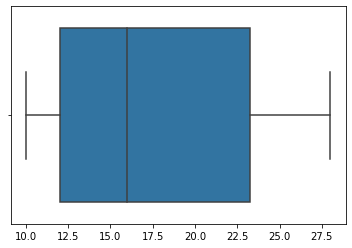

In [64]:
sns.boxplot(array1)

In [68]:
iqr = 10
12.5 - 10*1.5
22.5 + 10*1.5

37.5

In [66]:
np.median(array1)

16.0

[17, 11, 25, 29, 27, 180, 23, 27, 28, 23, 210, 10, 28, 24, 28, 12, 10, 23, 15, 26]


[17, 11, 25, 29, 27, 180, 23, 27, 28, 23, 210, 10, 28, 24, 28, 12, 10, 23, 15, 26]


c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

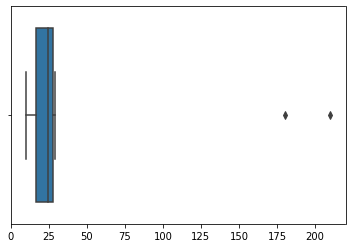

In [63]:
print(array2)
sns.boxplot(array2)

In [ ]:
IQR 

Q1 >> 1st Quartile / 25th percentile of the data
Q2 >> 2nd Quartile / 50th percentile / Median
Q3 >> 3rd Quartile / 75th percentile

IQR = Q3 - Q1

Q1 - 1.5 * IQR 
Q3 + 1.5 * IQR

In [78]:
q1 = np.quantile(array1, 0.25)
q2 = np.quantile(array1, 0.50)
q3 = np.quantile(array1, 0.75)
print(q1,q2,q3)
iqr = q3 - q1
print("IQR value is",iqr)
lower_tail = q1 - 1.5*iqr
upper_tail = q3 + 1.5*iqr
print("Lower Tail is ",lower_tail)
print("Upper Tail is ",upper_tail)

12.0 16.0 23.25
IQR value is 11.25
Lower Tail is  -4.875
Upper Tail is  40.125


In [80]:
q1 = np.quantile(array2, 0.25)
q2 = np.quantile(array2, 0.50)
q3 = np.quantile(array2, 0.75)
print(q1,q2,q3)
iqr = q3 - q1
print("IQR value is",iqr)
lower_tail = q1 - 1.5*iqr
upper_tail = q3 + 1.5*iqr
print("Lower Tail is ",lower_tail)
print("Upper Tail is ",upper_tail)

16.5 24.5 28.0
IQR value is 11.5
Lower Tail is  -0.75
Upper Tail is  45.25


In [ ]:
q1 = np.quantile(array2, 0.25)
q2 = np.quantile(array2, 0.50)
q3 = np.quantile(array2, 0.75)
print(q1,q2,q3)
iqr = q3 - q1
print("IQR value is",iqr)
lower_tail = q1 - 3*iqr  # Used to remove only extreme outliers
upper_tail = q3 + 3*iqr
print("Lower Tail is ",lower_tail)
print("Upper Tail is ",upper_tail)

In [47]:
import pandas as pd
import numpy as np
array1 = [10,20,13,14,12,15,15,15,17,18,20]
np.mean(array1)

15.363636363636363

In [52]:
df = pd.read_csv('titanic.csv')
df['Age'].mean()
df['Age'].std()

14.526497332334042

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
np.std(array1)

3.023325299693798

In [10]:
np.median(array1)

15.0

In [13]:
array2 = [10,20,13,144,12,15,15,15,17,18,20]
np.mean(array2)

27.181818181818183

In [15]:
np.log(array1)

array([2.30258509, 2.99573227, 2.56494936, 2.63905733, 2.48490665,
       2.7080502 , 2.7080502 , 2.7080502 , 2.83321334, 2.89037176,
       2.99573227])

In [16]:
np.log(array2)

array([2.30258509, 2.99573227, 2.56494936, 4.9698133 , 2.48490665,
       2.7080502 , 2.7080502 , 2.7080502 , 2.83321334, 2.89037176,
       2.99573227])

In [11]:
np.std(array2)

37.06215462955606

In [12]:
np.median(array2)

15.0

In [ ]:
model.coef_
model.intercept_